In [21]:
import pandas as pd
import pymysql


def load_dbscore_data():
    xl_file = 'C:\Temp\Anaconda\db_score.xlsx'
    db_score = pd.read_excel(xl_file)

    conn = pymysql.connect(host='localhost', user='root', password='---', db='datascience_week9', charset='utf8') 
    curs = conn.cursor(pymysql.cursors.DictCursor)

    make_table = 'create table if not exists db_score (sno int primary key, attendance float, homework float, discussion float, midterm float, final float, score float, grade char)'
    curs.execute(make_table)

    sql = 'insert into db_score (sno, attendance, homework, discussion, midterm, final, score, grade) values(%s, %s, %s, %s, %s, %s, %s, %s)'
    for i in range(len(db_score)):
        curs.execute(sql, tuple(db_score.values[i]))
    '''
    drop_sql = """drop table if exists db_score"""
    curs.execute(drop_sql)'''
    conn.commit()
    
    curs.close()
    conn.close()
    

load_dbscore_data()

IntegrityError: (1062, "Duplicate entry '1' for key 'db_score.PRIMARY'")

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pymysql
import time


def load_dbscore_data9():
    conn = pymysql.connect(host='localhost', user='root', password='dkfrpanjdi1~', db='datascience_week9', charset='utf8') 
    curs = conn.cursor(pymysql.cursors.DictCursor)
    
    sql = "select * from db_score"
    curs.execute(sql)
    
    data  = curs.fetchall()
    
    curs.close()
    conn.close()
    
    #X = [ (t['attendance'], t['homework'], t['midterm'] ) for t in data ]
    X = [ ( t['final'] ) for t in data ]
    X = np.array(X)
    
    y = [ (t['score']) for t in data]
    y = np.array(y)

    return X, y

X, y = load_dbscore_data9()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     228.6
Date:                Thu, 04 Nov 2021   Prob (F-statistic):           1.94e-26
Time:                        10:45:54   Log-Likelihood:                -322.30
No. Observations:                  92   AIC:                             648.6
Df Residuals:                      90   BIC:                             653.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.6247      1.766     23.009      0.0

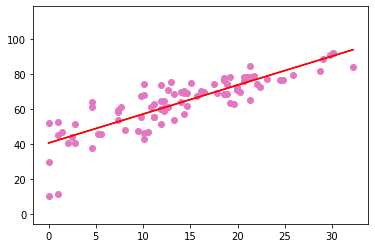

In [29]:
import statsmodels.api as sm
X_const = sm.add_constant(X)

model = sm.OLS(y, X_const)
ls = model.fit()

print(ls.summary())


ls_c = ls.params[0]
ls_m = ls.params[1]

from matplotlib import pyplot as plt
from celluloid import Camera

def gradient_descent_naive(X, y):

    fig = plt.figure()
    ax = fig.subplots()
    
    camera = Camera(fig)
    
    epochs = 100000
    min_grad = 0.0001
    learning_rate = 0.001
    
    m = 0.0
    c = 0.0
    
    n = len(y)
    
    c_grad = 0.0
    m_grad = 0.0
    
    for epoch in range(epochs):
        
        for i in range(n):
            y_pred = m * X[i] + c
            m_grad += 2*(y_pred-y[i]) * X[i]
            c_grad += 2*(y_pred - y[i])

        c_grad /= n
        m_grad /= n
        
        m = m - learning_rate * m_grad
        c = c - learning_rate * c_grad
        
        if ( epoch % 1000 == 0):
            y_pred = m*X + c 
            plt.scatter(X, y)
            plt.plot([min(X), max(X)], [min(y_pred), max(y_pred)], color='red')
            ax.plot([min(X), max(X)], [min(y_pred), max(y_pred)], color='red')
            camera.snap()
        
        if ( abs(m_grad) < min_grad and abs(c_grad) < min_grad ):
            break
        
    animation = camera.animate(interval=50, blit = True)
    animation.save('hw2.gif')
        
    return m, c

m, c = gradient_descent_naive(X, y)

print("gdn_m=%f, gdn_c=%f" %(m, c) )
print("ls_m=%f, ls_c=%f" %(ls_m, ls_c) )
